Do something like:
https://www.researchgate.net/figure/mage-of-Abraham-Lincoln-as-a-matrix-of-pixel-values_fig1_330902210

Load number from mnist dataset as example

Alternative: https://www.researchgate.net/figure/Digitization-and-pixel-values-of-an-image-Image-Pixels-2019_fig1_338332295

In [59]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import rasterio
from pathlib import Path

In [ ]:
image_path = r'C:\Users\Fabian\Documents\Masterarbeit_Daten\API_test\T32UNA_20230208T103211_TCI_10m.jp2'
image = rasterio.open(image_path)

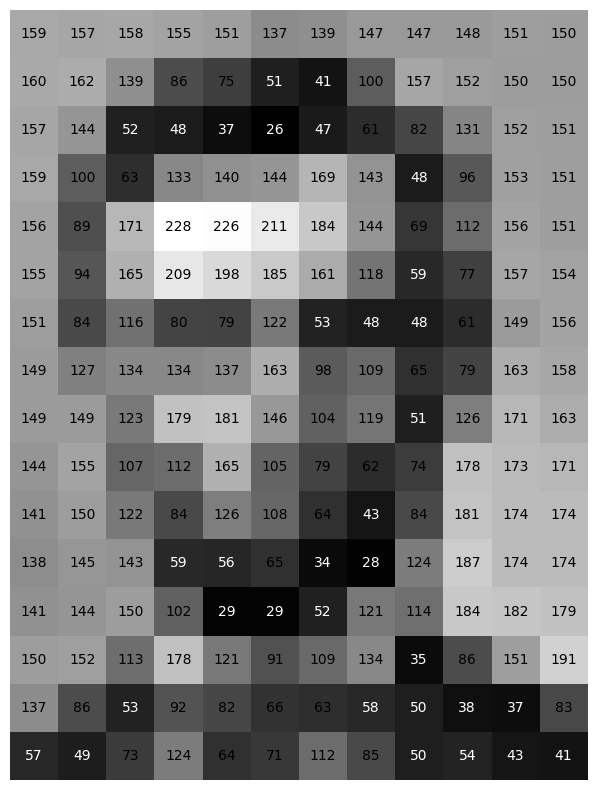

In [39]:
img = Image.open("372px-Abraham_Lincoln_O-77_matte_collodion_print.jpg")
img = img.convert('L')
img.thumbnail((20, 20))
img_matrix = np.array(img)
img_matrix = img_matrix [:-4, 2:-2]

fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img_matrix , cmap='gray')
for i in range(img_matrix.shape[0]):
    for j in range(img_matrix.shape[1]):
        if img_matrix [i, j] > 60:
            plt.annotate(str(img_matrix [i, j]), xy=(j, i), ha='center', va='center')
        else:
            plt.annotate(str(img_matrix [i, j]), xy=(j, i), ha='center', va='center', color='white')
plt.axis('off')
plt.show()

In [40]:
fig.savefig("Image_to_matrix.pdf", format="pdf", bbox_inches="tight")

### Show difference between Image Classification, Object detection, and Image Segmentation 

[CS231 Standfort](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture11.pdf) Page 17

In [12]:
root_path = Path(r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local')
filename = '32UMA_247_2018-9-27.tif'
image_path = root_path / 'images_undersampling' / filename
mask_path = root_path / 'masks_undersampling' / filename

In [13]:
image = rasterio.open(image_path).read()
mask = rasterio.open(mask_path).read()

In [94]:
img = image[1:4,:,:].transpose(1,2,0)

In [122]:
def show_rgb_sample(img, mask=None, ax=ax1,  show_mask=True, show_bbox=True, show_axis=False):
    ax.imshow(img)
    if show_mask:
        ax.imshow(mask.squeeze(), cmap='jet', alpha=0.5*(mask.squeeze()==True))
    if show_bbox:
        rect = patches.Rectangle((119, 105), 25, 65, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    ax.set_xlim(85, 185)
    ax.set_ylim(85, 185)
    if not show_axis:
        ax.axis('off')

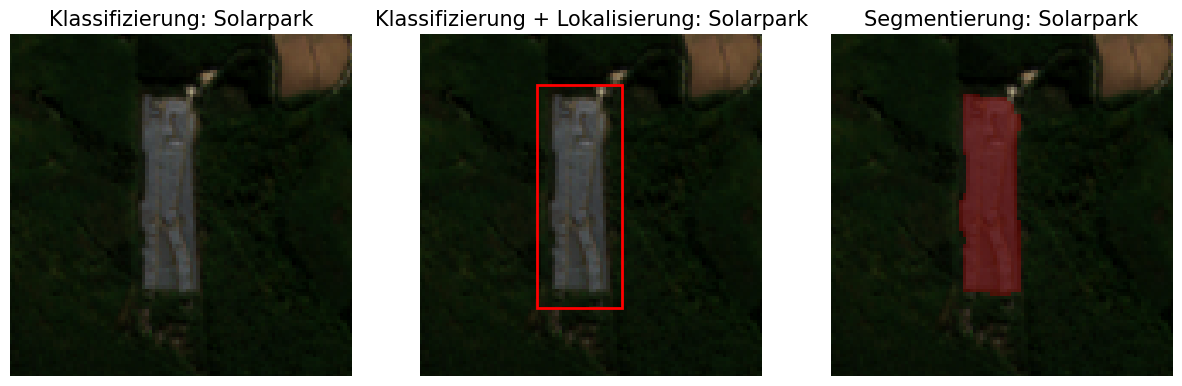

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
show_rgb_sample(img, mask, ax=ax1, show_mask=False, show_bbox=False, show_axis=False)
ax1.set_title('Klassifizierung: Solarpark', fontsize=15)
show_rgb_sample(img, mask, ax=ax2, show_mask=False, show_bbox=True, show_axis=False)
ax2.set_title('Klassifizierung + Lokalisierung: Solarpark', fontsize=15)
show_rgb_sample(img, mask, ax=ax3, show_mask=True, show_bbox=False, show_axis=False)
ax3.set_title('Segmentierung: Solarpark', fontsize=15);

In [119]:
fig.savefig("Classification_localization_segmentation.pdf", format="pdf", bbox_inches="tight")

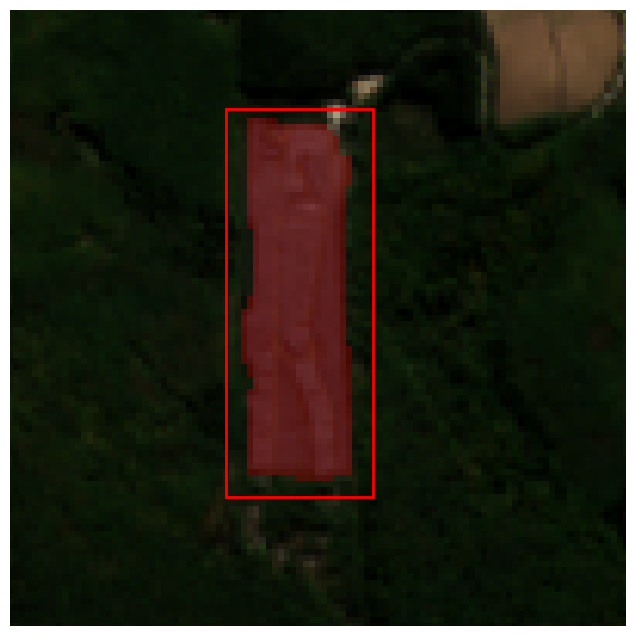

In [83]:
show_rgb_sample(image, mask)

### Create True Color Image (RGB) and False Color Image  (NIR, Red, Green)

In [120]:
root_path = Path(r'C:\Users\Fabian\Documents\Github_Masterthesis\Solarpark-detection\data_local')
filename = '32UMD_679_2018-7-27.tif'
image_path = root_path / 'images_undersampling' / filename

In [121]:
image = rasterio.open(image_path).read()

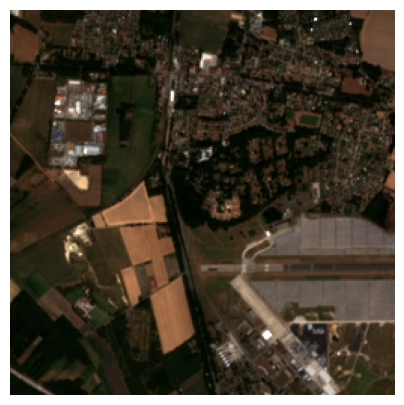

In [135]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
ax1.imshow(image[1:4,:,:].transpose(1,2,0))
ax1.axis('off');

In [134]:
fig.savefig("TCI_32UMD_679_2018-7-27.pdf", format="pdf", bbox_inches="tight")

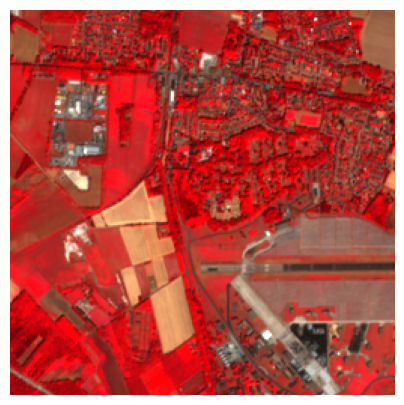

In [136]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
ax1.imshow(image[0:3,:,:].transpose(1,2,0))
ax1.axis('off');

In [131]:
fig.savefig("FCI_32UMD_679_2018-7-27.pdf", format="pdf", bbox_inches="tight")